In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SENTINELS = {'PRECIP':['NA'],'EVAP':['NA'],'TMAX':['NA'],'TMIN':['NA']}

In [3]:
df0=pd.read_csv('aguaprieta.txt',skiprows=0,sep='\s+', na_values=SENTINELS)

In [4]:
df = pd.DataFrame(df0)

In [5]:
df['FECHAS'] = pd.to_datetime(df0['FECHA'], dayfirst=True)



In [6]:
df.dtypes

FECHA             object
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAS    datetime64[ns]
dtype: object

In [7]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN,FECHAS
0,01/02/1961,0.0,NaN,19.5,2.0,1961-02-01
1,02/02/1961,0.0,NaN,20.0,2.5,1961-02-02
2,03/02/1961,0.0,2.7,21.5,1.8,1961-02-03
3,04/02/1961,0.0,3.0,16.7,1.0,1961-02-04
4,05/02/1961,0.0,1.3,11.4,4.0,1961-02-05


In [8]:
df0['Año'] = df0['FECHAS'].dt.year
df0['Mes'] = df0['FECHAS'].dt.month

In [9]:
df0.head()


,FECHA,PRECIP,EVAP,TMAX,TMIN,FECHAS,Año,Mes
0,01/02/1961,0.0,NaN,19.5,2.0,1961-02-01,1961,2
1,02/02/1961,0.0,NaN,20.0,2.5,1961-02-02,1961,2
2,03/02/1961,0.0,2.7,21.5,1.8,1961-02-03,1961,2
3,04/02/1961,0.0,3.0,16.7,1.0,1961-02-04,1961,2
4,05/02/1961,0.0,1.3,11.4,4.0,1961-02-05,1961,2


In [10]:
df = pd.DataFrame(df0)


In [11]:

PrecipMensual = [df0['PRECIP'][df0['Mes']==[i+1]].mean() for i in range(0,12)]
PrecipAnual = [df0['PRECIP'][df0['Año']==[i+1]].sum() for i in range(1961,2011)] 
TmaxMensual = [df0['TMAX'][df0['Mes']==[i+1]].mean()  for i in range(0,12)] 
TMINMensual = [df0['TMIN'][df0['Mes']==[i+1]].mean()  for i in range(0,12)] 
TmaxAnual = [df0['TMAX'][df0['Año']==[i+1]].mean()  for i in range(1961,2011)] 
TminAnual = [df0['TMIN'][df0['Año']==[i+1]].mean()  for i in range(1961,2011)] 



In [244]:
Meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
años=[]

for i in  range (50):

    valor= 1961 + i

    años.append (valor)

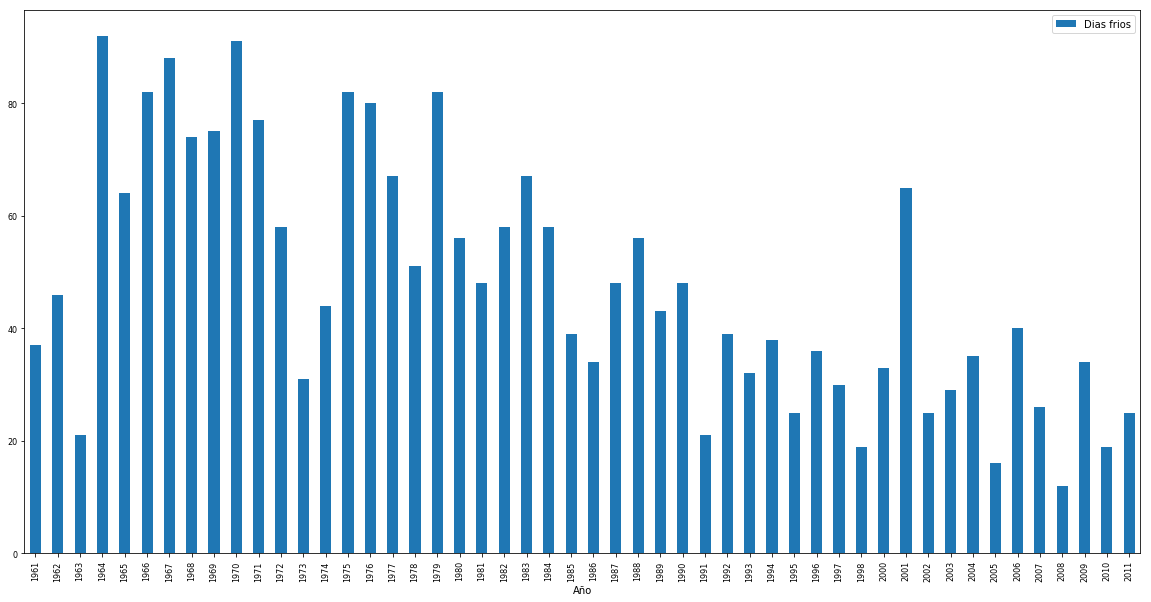

In [263]:
DiasFrios = pd.DataFrame(df.loc[df['TMIN']<0])
DiasFrios= DiasFrios.groupby(df['Año'])['Año'].agg({"count"})
DiasFrios = DiasFrios.rename({'count':'Dias frios'}, axis='columns')
DiasFrios.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)

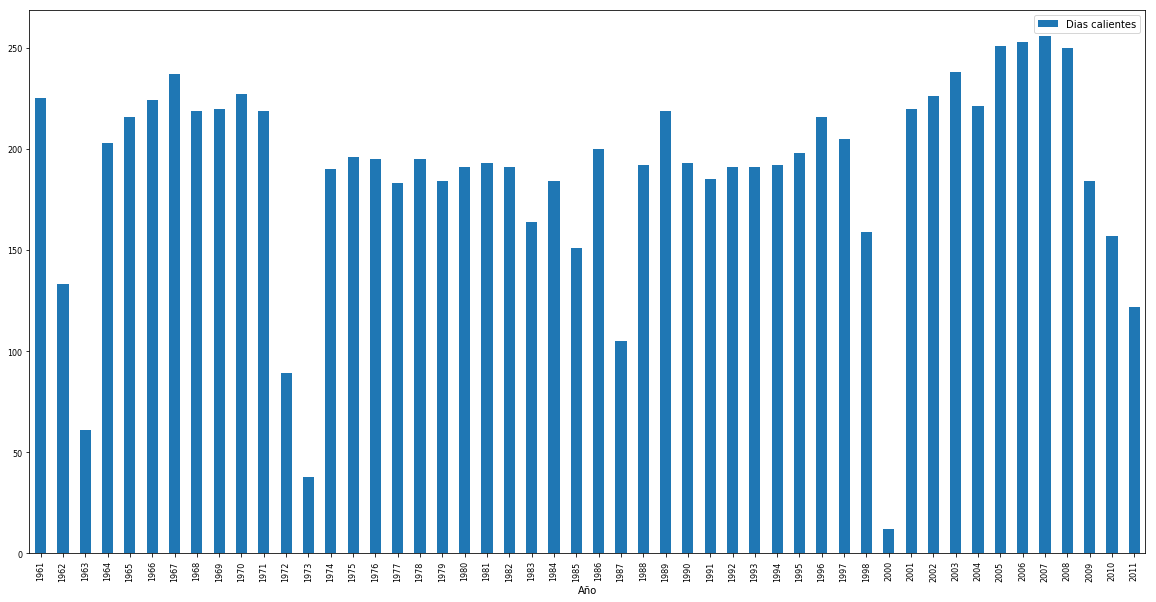

In [264]:
DiasCalientes = pd.DataFrame(df.loc[df['TMAX']>25])
DiasCalientes= DiasCalientes.groupby(df['Año'])['Año'].agg({"count"})
DiasCalientes= DiasCalientes.rename({'count':'Dias calientes'}, axis='columns')
DiasCalientes.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)

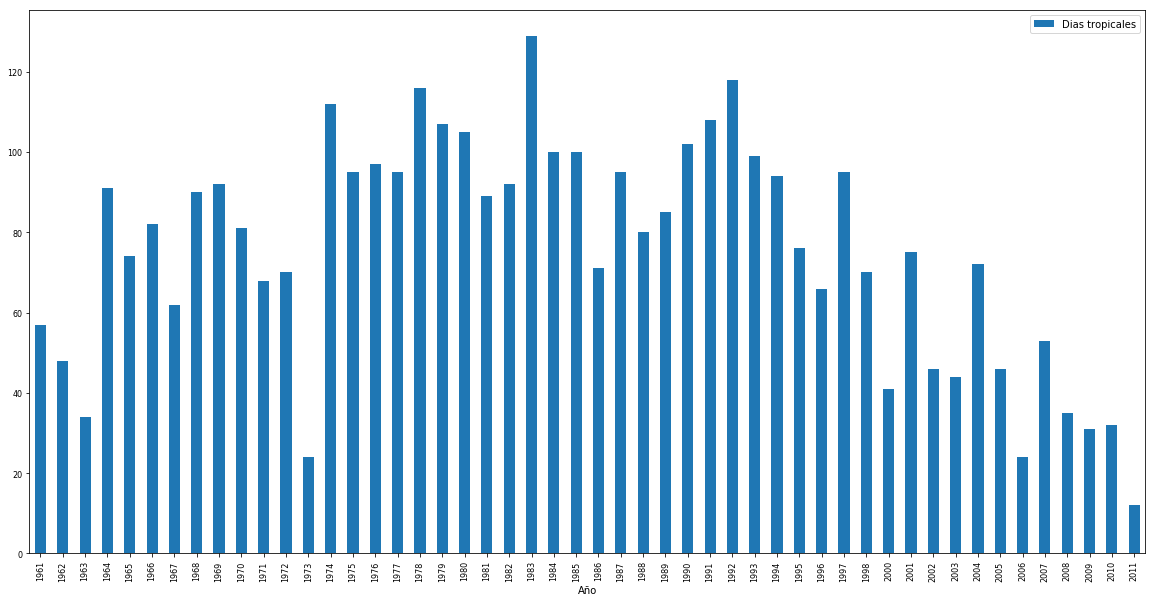

In [265]:
DiasTropicales = pd.DataFrame(df.loc[df['TMAX']<20])
DiasTropicales= DiasTropicales.groupby(df['Año'])['Año'].agg({"count"})
DiasTropicales=DiasTropicales.rename({'count':'Dias tropicales'}, axis='columns')
DiasTropicales.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)

In [16]:
df['TPROM'] = (df.TMAX + df.TMIN)/2
primdias = []
primseis=-1

for j in range(df["Año"][0],df["Año"][len(df)-1]+1):
    for i in range(5,len(df)-1):
        if(df["Año"][i-5] == j):
            if(df["TPROM"][i-5] > 5 and df["TPROM"][i-4] > 5 and df["TPROM"][i-3] > 5 and
               df["TPROM"][i-2] > 5 and df["TPROM"][i-1] > 5 and df["TPROM"][i]   > 5):
                    primseis = i
                    break
    if(primseis != -1):
        primdias.append(primseis)
        primseis= -1
    else:
        primdias.append("NA")
   

In [26]:
ultdias = []
ultseis = -1

for j in range(df["Año"][len(df)-1],df["Año"][0]-1,-1):
    for i in range(len(df)-1,5,-1):
        if(df["Año"][i] == j):
            if(df["TPROM"][i-5] < 5 and df["TPROM"][i-4] < 5 and df["TPROM"][i-3] < 5 and
               df["TPROM"][i-2] < 5 and df["TPROM"][i-1] < 5 and df["TPROM"][i]   < 5):
                    ultseis = i-5
                    break
    if(ultseis != -1):
        ultdias.append(ultseis)
        ultseis= -1
    else:
        ultdias.append("NA")

        
   

In [27]:
GSL = []
inicial = df['Año'][0]
for i in range(0,len(ultdias)):
    if(ultdias[i]!="NA" and primdias[i]!="NA"):
        GSL.append(ultdias[i]-primdias[i])
    if(ultdias[i]=='NA'):
            GSL.append( len(df[df['Año'] == inicial].index) )
    else:
        if(primdias[i]=='NA'):
            GSL.append(0)
    inicial=inicial+1

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


([<matplotlib.axis.XTick at 0x32adf28390>,
 <a list of 50 Text xticklabel objects>)

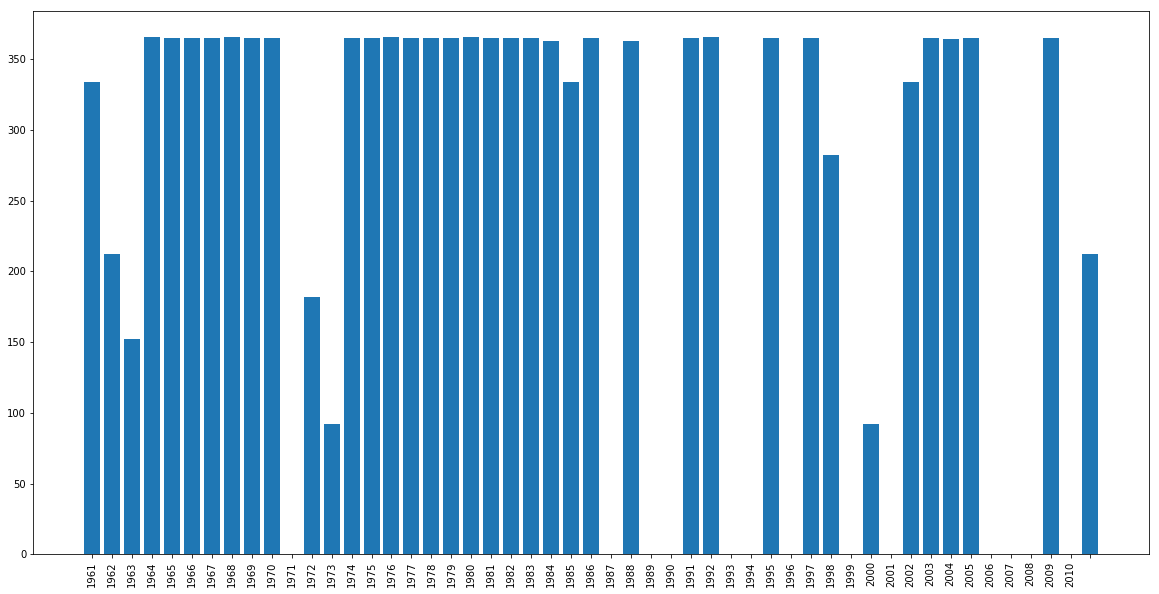

In [246]:
for i in range(0,49):
    if (GSL[i]<0):
        GSL[i]=0
    elif(GSL[i]>366):
        GSL[i]=0
print(años)
nx=np.arange(len(GSL))
plt.figure(figsize=(20,10))
plt.bar(nx,GSL)
plt.xticks(nx,años,rotation=90)        

In [255]:
Fecha=[]
Mes=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre", "Noviembre", "Diciembre" ]
TempMaxMaxMens = []


for i in range(1961,2011):
    for j in range(1,13):
        a = [df['TMAX'][df['Mes']==[j]][df['Año']==[i]].max()]
        Mes.append(Mes[j-1])
        Fecha.append(Mes[j-1]+ " / "+ repr(i) )
        TempMaxMaxMens.append(a)
Mes

nx=np.arange(len(TempMaxMaxMens))
TempMaxMaxMens= pd.DataFrame(TempMaxMaxMens)
TempMaxMaxMens['Fecha']= Fecha
TempMaxMaxMens.head()


,0,Fecha
0,NaN,Enero / 1961
1,26.8,Febrero / 1961
2,30.0,Marzo / 1961
3,35.8,Abril / 1961
4,38.5,Mayo / 1961


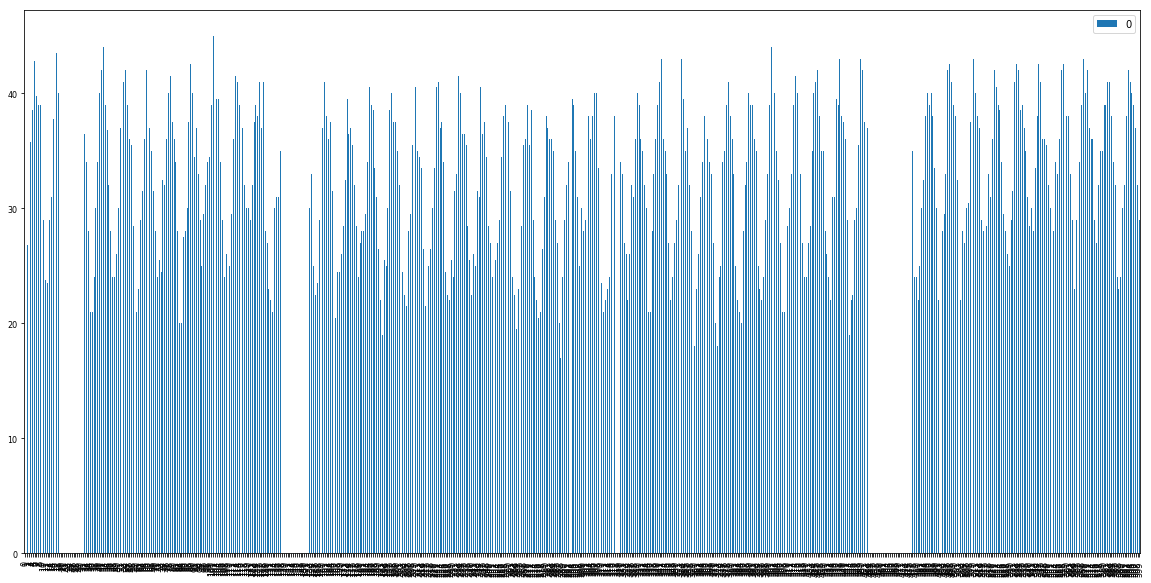

In [256]:
TempMaxMaxMens.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)


In [ ]:
TempMaxMinMens = []
Fecha=[]

for i in range(1961,2011):
    for j in range(1,13):
        a = [df['TMIN'][df['Mes']==[j]][df['Año']==[i]].max()]
        Mes.append(Mes[j-1])
        Fecha.append(Mes[j-1]+ " / "+ repr(i) )
        TempMaxMinMens.append(a)
Mes
        
TempMaxMinMens= pd.DataFrame(TempMaxMinMens)
TempMaxMinMens['Fecha']= Fecha

TempMaxMinMens.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)


In [ ]:
TempMinMaxMens = []
Fecha=[]

for i in range(1961,2011):
    for j in range(1,13):
        a = [df['TMAX'][df['Mes']==[j]][df['Año']==[i]].min()]
        Mes.append(Mes[j-1])
        Fecha.append(Mes[j-1]+ " / "+ repr(i) )
        TempMinMaxMens.append(a)
Mes
        
TempMinMaxMens= pd.DataFrame(TempMinMaxMens)
TempMinMaxMens['Fecha']= Fecha
TempMinMaxMens.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)
#TempMinMaxMens


In [ ]:
TempMinMinMens = []
Fecha=[]

for i in range(1961,2011):
    for j in range(1,13):
        a = [df['TMIN'][df['Mes']==[j]][df['Año']==[i]].min()]
        Mes.append(Mes[j-1])
        Fecha.append(Mes[j-1]+ " / "+ repr(i) )
        TempMinMinMens.append(a)
Mes
        
TempMinMinMens= pd.DataFrame(TempMinMinMens)
TempMinMinMens['Fecha']= Fecha
TempMinMinMens.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)
#TempMinMinMens


In [ ]:
TPromMens = []
Fecha=[]
df['TPROM']= df.TMAX - df.TMIN

for i in range(1961,2011):
    for j in range(1,13):
        a = [df['TPROM'][df['Mes']==[j]][df['Año']==[i]].mean()]
        Mes.append(Mes[j-1])
        Fecha.append(Mes[j-1]+ " / "+ repr(i) )
        TPromMens.append(a)
Mes
        
TPromMens= pd.DataFrame(TPromMens)
TPromMens['Fecha']= Fecha
TPromMens.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)


In [ ]:
PrecMaxMens = []
Fecha=[]

for i in range(1961,2011):
    for j in range(1,13):
        a = [df['PRECIP'][df['Mes']==[j]][df['Año']==[i]].max()]
        Mes.append(Mes[j-1])
        Fecha.append(Mes[j-1]+ " / "+ repr(i) )
        PrecMaxMens.append(a)
             
PrecMaxMens= pd.DataFrame(PrecMaxMens, columns=['PREC'])
PrecMaxMens['Fecha']= Fecha
PrecMaxMens.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)

([<matplotlib.axis.XTick at 0x32abf5da20>,
 <a list of 600 Text xticklabel objects>)

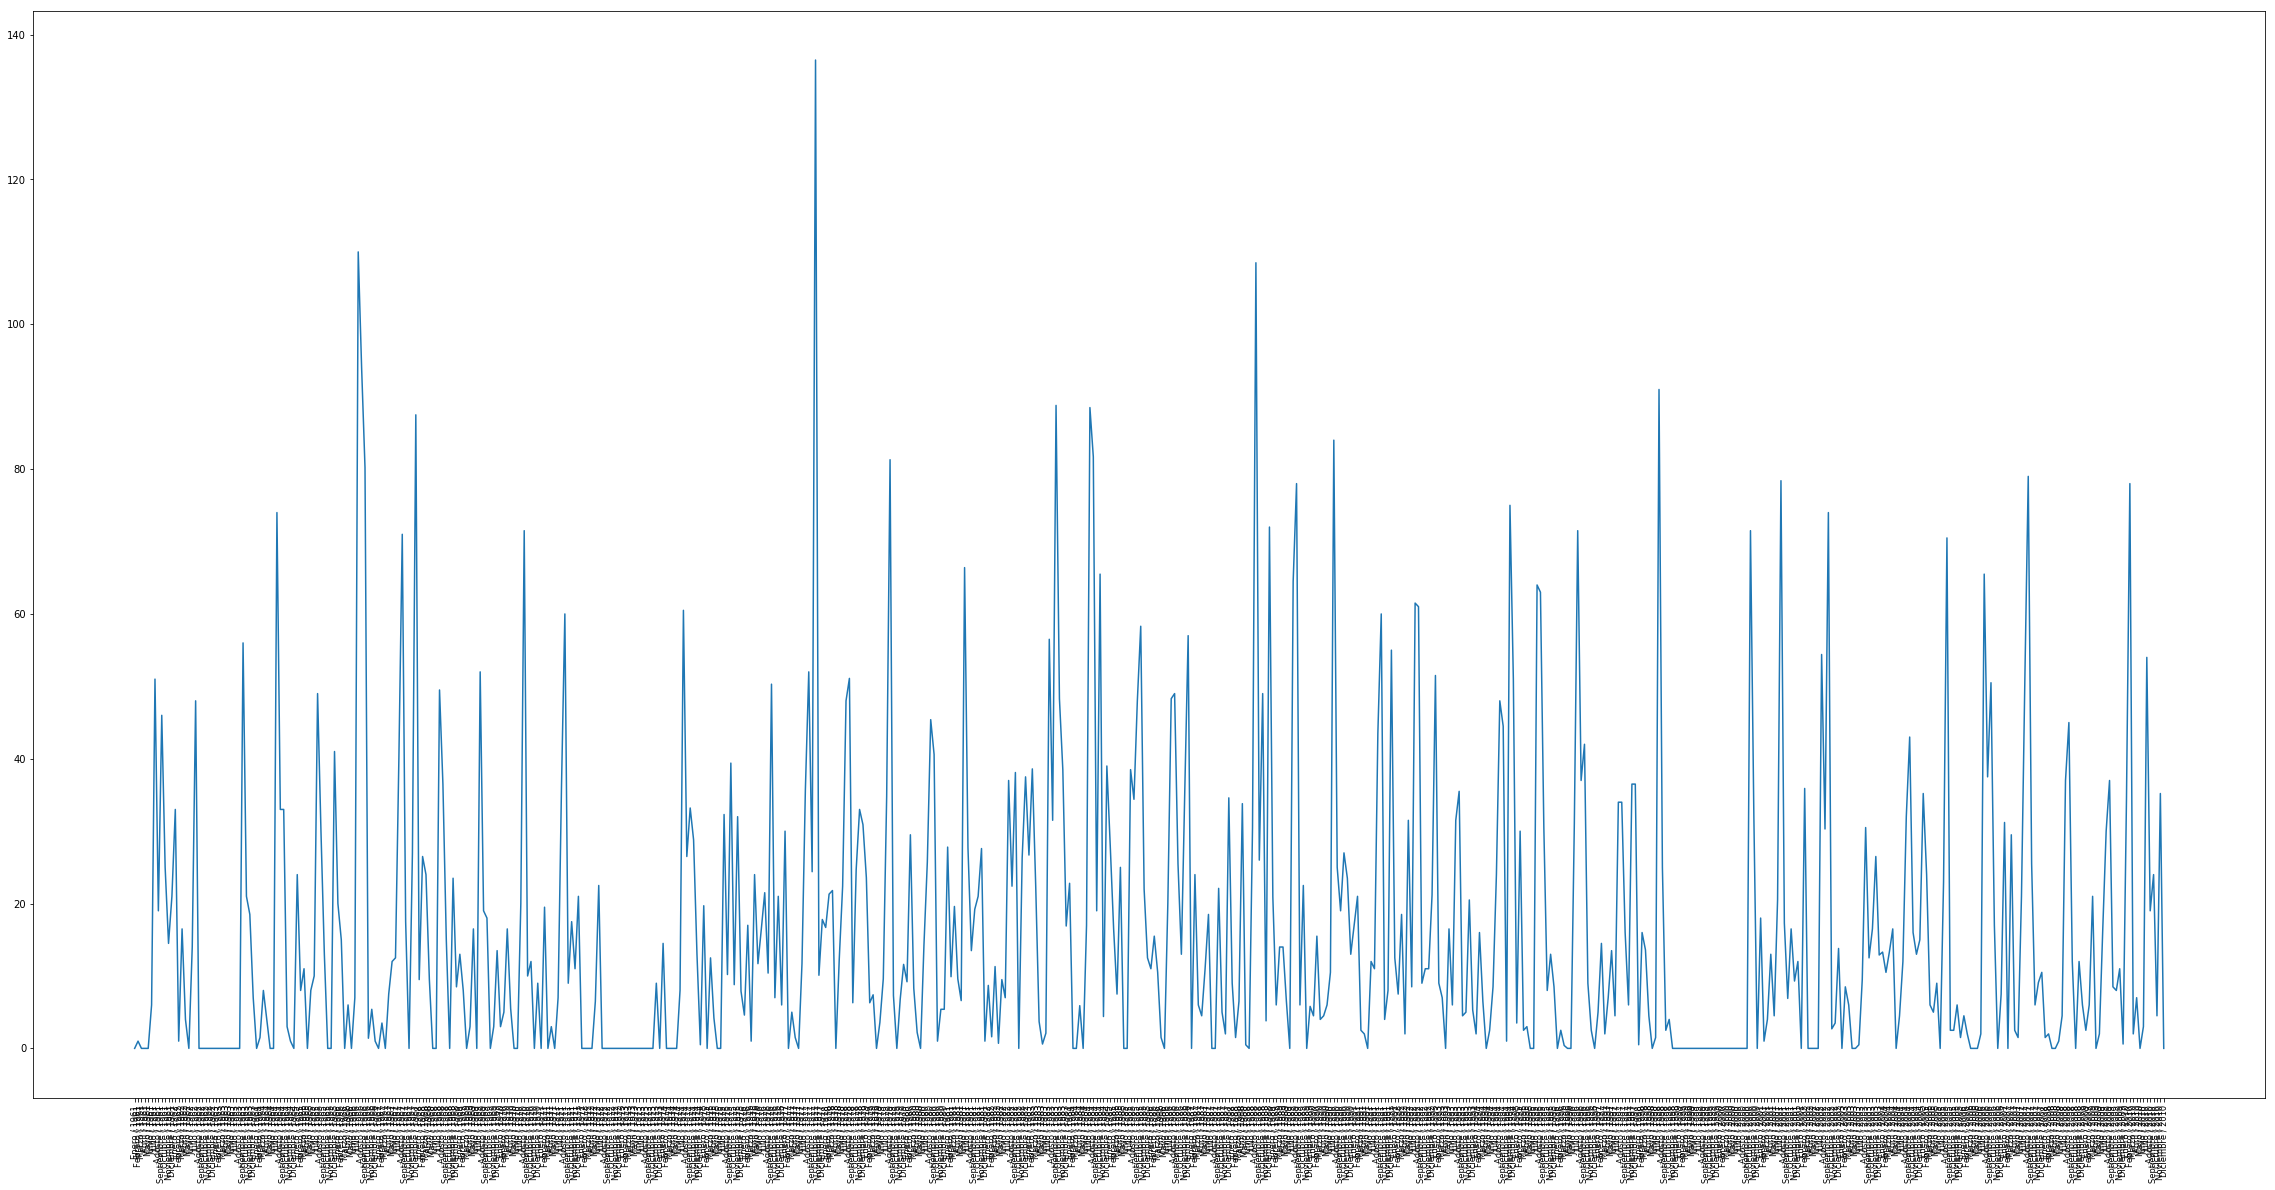

In [167]:
Prec5 = []
mx = -10000

inicial=df['Año'][0]
nAños=df['Año'].nunique()

for i in range(0,nAños):
    df_año = df[df['Año']==inicial]
    for j in range(1,13):
        df_mes = df_año[df_año['Mes']==j]
        df_mes = df_mes.reset_index()
        if(df_mes.PRECIP.count()!=0 and df_mes.PRECIP.mean()!=0):
            for k in range(4,len(df_mes)):
                suma = (df_mes["PRECIP"][k-4]+df_mes["PRECIP"][k-3]+
                         df_mes["PRECIP"][k-2]+df_mes["PRECIP"][k-1]+
                         df_mes["PRECIP"][k])
               
                if(suma>mx):
                    mx=suma
            
            Prec5.append(mx)
            mx=-10000
        else:
            Prec5.append(0.0)
        
    inicial=inicial+1
n=np.arange(len(Fecha))

plt.figure(figsize=(40,20))
plt.plot(n,Prec5)

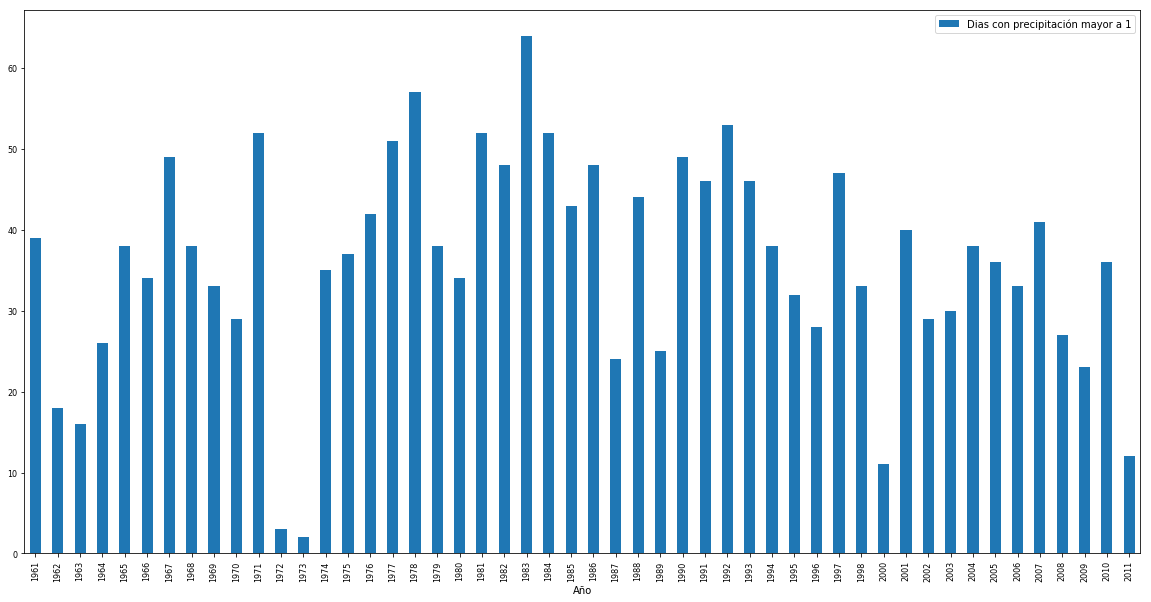

In [257]:
PrecipMay1 = pd.DataFrame(df.loc[df['PRECIP']>1])
PrecipMay1= PrecipMay1.groupby(df['Año'])['Año'].agg({"count"})
PrecipMay1=PrecipMay1.rename({'count':'Dias con precipitación mayor a 1'}, axis='columns')
PrecipMay1.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)


In [ ]:
PrecipMay10 = pd.DataFrame(df.loc[df['PRECIP']>10])
PrecipMay10= PrecipMay10.groupby(df['Año'])['Año'].agg({"count"})
PrecipMay10.head()
PrecipMay10.rename({'count':'Dias con precipitación mayor a 10'}, axis='columns')
PrecipMay10.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)

In [ ]:
PrecipMay20 = pd.DataFrame(df.loc[df['PRECIP']>20])
PrecipMay20= PrecipMay20.groupby(df['Año'])['Año'].agg({"count"})
PrecipMay20.head()
PrecipMay20.rename({'count':'Dias con precipitación mayor a 20'}, axis='columns')
PrecipMay20.plot(kind="bar",figsize=(20,10),rot=90,fontsize=8)

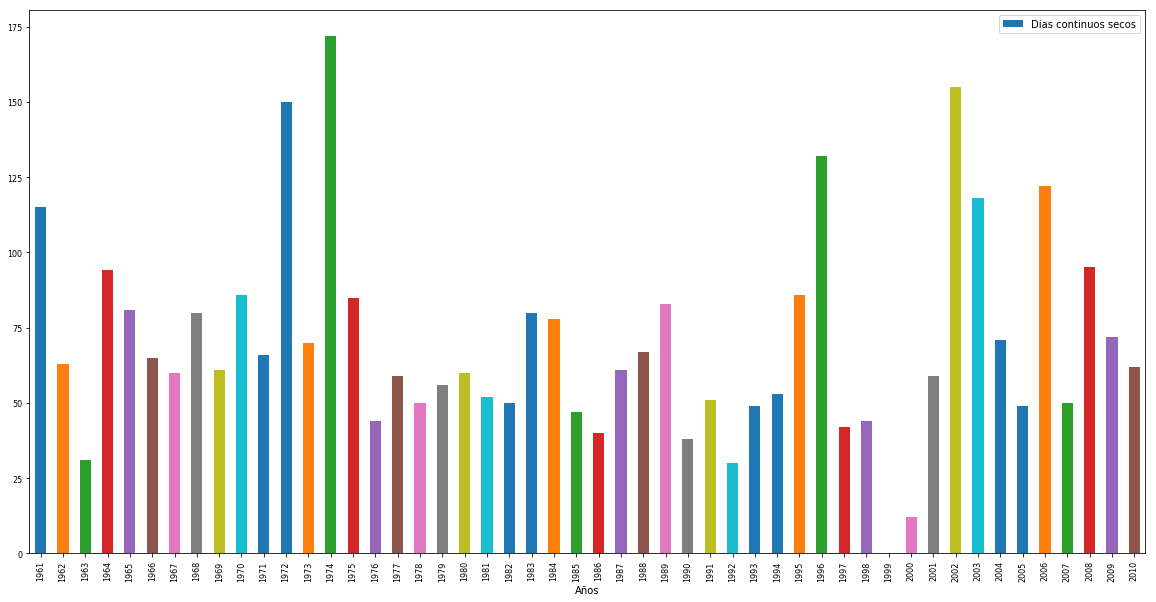

In [261]:
CDD_año = []
CDD = []
dias = 0

inicial=df['Año'][0]
nAños=df['Año'].nunique()

for i in range(0,nAños):
    df_año = df[df['Año']==inicial]
    df_año = df_año.reset_index()
    for k in range(0,len(df_año)):
        if(df_año['PRECIP'][k]<1):
            dias = dias +1
        else:
            CDD_año.append(dias)
            dias=0
    CDD_max= max(CDD_año,default=0)
    CDD_año = []
    CDD.append(CDD_max)
    inicial=inicial+1
d = {'Años': años, 'Dias continuos secos': CDD}
CDD= pd.DataFrame(d)
CDD.plot(x="Años",y="Dias continuos secos",kind="bar",figsize=(20,10),rot=90,fontsize=8)

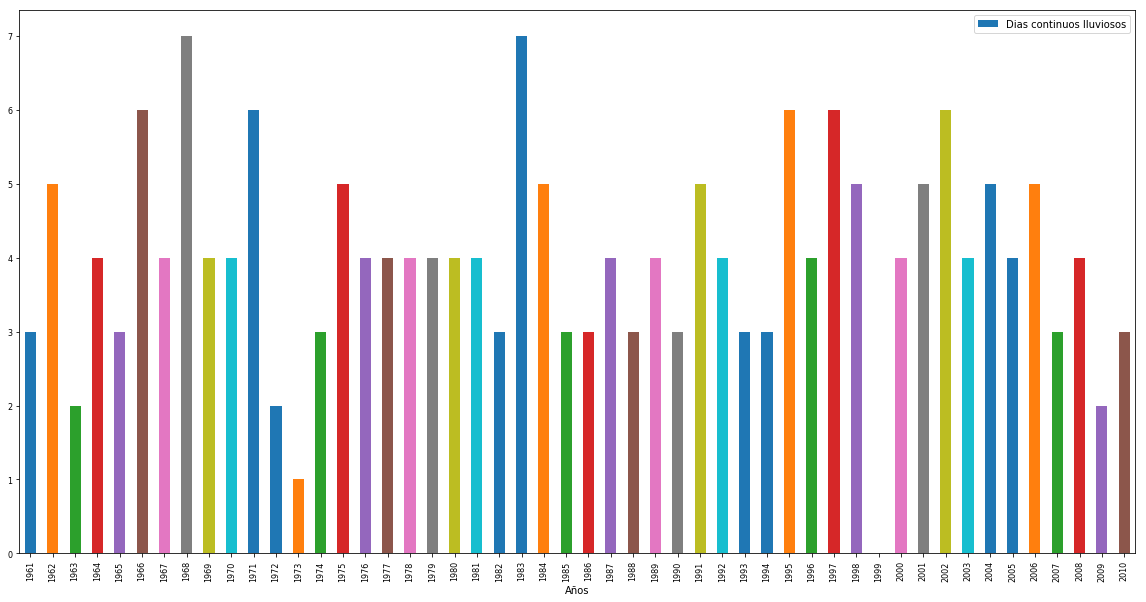

In [262]:
CDD_año = []
CDD = []
dias = 0

inicial=df['Año'][0]
nAños=df['Año'].nunique()

for i in range(0,nAños):
    df_año = df[df['Año']==inicial]
    df_año = df_año.reset_index()
    for k in range(0,len(df_año)):
        if(df_año['PRECIP'][k]>1):
            dias = dias +1
        else:
            CDD_año.append(dias)
            dias=0
    CDD_max= max(CDD_año,default=0)
    CDD_año = []
    CDD.append(CDD_max)
    inicial=inicial+1
d = {'Años': años, 'Dias continuos lluviosos': CDD}
CDD= pd.DataFrame(d)
CDD.plot(x="Años",y="Dias continuos lluviosos",kind="bar",figsize=(20,10),rot=90,fontsize=8)